# Laboratorio 4 - Regresión y Clustering

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 1 - Precio de los Inmuebles

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt
#Librerías importadas para la realización del entregable
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
#Sirve para centrar las imágenes
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#Importamos el CSV
dataset = pd.read_csv('casas.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


El atributo id no es útil en el estudio del precio de las casas ya que para nosotros significa el orden en el que los inmuebles se han añadido al conjunto de datos. Es por esto que procedemos a eliminarlo. Del mismo modo, el precio de las distintas casas es nuestra variable objetivo por lo que lo separamos del dataset.  Finalmente, obtendremos los 79 atributos que describen las casas de este conjunto de datos.

In [5]:
#Creamos el array con el precio de cada registro.
precioDeVenta = dataset["SalePrice"].values
#Eliminamos los atributos ID y SalePrice
dataset = dataset.drop(columns=['Id', 'SalePrice'])
dataset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


<strong>Datos duplicados</strong>

In [6]:
#Miramos cuántos datos duplicados hay
numDuplicados = dataset.duplicated().sum()
print('Hay',numDuplicados,'valores duplicados')

Hay 0 valores duplicados


<strong>Datos nulos</strong>

In [7]:
#Miramos cuántos datos nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


En nuestra opinión, para calcular el precio de una casa, son importantes todos los atributos ya que cada valor que tome el inmueble en cada uno de ellos será el que diferencie el precio. Es por esto que hemos decidido cambiar el valor NaN de nuestro dataset por valores que no sean nulos para un mejor análisis del precio.
Además, hemos detectado que hay ciertas columnas que el valor NA implica NO. No es que sea un valor desconocido, es que las casas no tienen esas propiedades.

In [8]:
#En las columnas no numéricas, cambiamos los nulos por el valor 'No'
columnasNoNumericas = dataset.dtypes[dataset.dtypes == 'object']
columnasNoNumericas.index

#Hemos detectado que hay ciertas columnas que el NA implica NO por lo que pondremos ese valor realmente, 
#no es que sea desconocido, es que no tienen esa propiedad las casas

columnasNAesNo = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                  'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature',]

for col in columnasNAesNo:
    dataset[col] = dataset[col].fillna('No')

In [9]:
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,MnPrv,No,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,4,2010,WD,Normal


In [10]:
#Actualizamos las columnas nulas
#Volvemos a comprobar cuántos valores nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
GarageYrBlt,81,5.547945


In [11]:
#En las columnas no numéricas, cambiamos los nulos por el valor 'Desconocido'
columnasNoNumericas = dataset.dtypes[dataset.dtypes == 'object']

for col in columnasNoNumericas.index:
    if(col in dataFrameNulos.index):
        dataset[col] = dataset[col].fillna('Desconocido')

In [12]:
#Actualizamos las columnas nulas
#Volvemos a comprobar cuántos valores nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrArea,8,0.547945
GarageYrBlt,81,5.547945


La columna GarageYrBlt con 81 nulos es resultante de casas sin garaje. Cambiaremos el valor nulo por un 0 ya que el atributo es de tipo <i>float64</i>

In [13]:
columnasNumericas = dataset.dtypes[dataset.dtypes == 'float']
columnasNumericas

dataset['GarageYrBlt'] = dataset.fillna(0)

In [14]:
#Actualizamos las columnas nulas
#Volvemos a comprobar cuántos valores nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

#Calculamos el porcentaje de nulos
for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrArea,8,0.547945


A continuación tratamos los elementos de tipo numérico. Al tener pocos registros que contienen estos les añadimos el valor medio de ese atributo. Eliminar 200 registros por carecer del valor de 'LotFrontage' nos parece eliminar datos significativos.

In [15]:
#Como tenemos pocos datos nulos, vamos a poner el valor medio en cada uno de los valores nulos que tenemos.
#Así no eliminamos datos y podemos completar el dataset con los valores medios.
for col in dataFrameNulos.index:
    dataset[col] = dataset[col].fillna(round(dataset[col].mean(),2))

Finalmente, realizamos la última comprobación de valores nulos

In [16]:
#Comprobamos nulos
print('El dataset tiene un tamaño de:',dataset.shape)
print('Existen',dataset.isnull().sum().sum(),'campos nulos')

El dataset tiene un tamaño de: (1460, 79)
Existen 0 campos nulos


In [17]:
#Visualizamos el dataset
dataset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.00,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,80.00,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,68.00,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,60.00,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,84.00,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,WD,Normal
5,50,RL,85.00,14115,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.00,10084,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,8,2007,WD,Normal
7,60,RL,70.05,10382,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,Shed,350,11,2009,WD,Normal
8,50,RM,51.00,6120,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,4,2008,WD,Abnorml
9,190,RL,50.00,7420,Pave,No,Reg,Lvl,AllPub,Corner,...,0,0,No,No,No,0,1,2008,WD,Normal


A continuación, categorizamos los valores utilizando la función <i>get_dummies</i>. Necesitamos categorizar los datos para procesar correctamente la regresión entre las diferentes variables que aparecen en el dataset.

La función <i>get_dummies</i> nos creará una columna por cada uno de los valores que puede tomar un atributo y la rellenará con 0 y 1 en función del valor del atributo en ese registro. Es por esto que una vez realizada la categorización, aumentarán las dimensiones del conjunto de datos.

In [18]:
dataset = pd.get_dummies(dataset)
dataset.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.00,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.00,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.00,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.00,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.00,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.00,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,1,0,0,0,0,1,0
7,60,70.05,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,1,0,0,0,0,1,0
8,50,51.00,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,190,50.00,7420,5,6,1939,1950,0.0,851,0,...,0,0,0,1,0,0,0,0,1,0


### 1) Para empezar, cread un modelo en el que se tengan en cuenta todas las características de los inmuebles para predecir/estimar el precio de un inmueble. (0.75 puntos)

In [19]:
dataset

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [20]:
#Target variable
precios = pd.DataFrame({'Precio':precioDeVenta})
precios

,Precio
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [21]:
#Dividimos el conjunto de datos entre los registros de entrenamiento (80%) y los registros de validación (20%)
X_train, X_test, y_train, y_test = train_test_split(dataset, precioDeVenta, test_size = 0.2, random_state = 42)

In [22]:
#Calculamos la regresión múltiple
reg = LinearRegression().fit(X_train, y_train)
puntuacion = reg.score(X_test, y_test)
coeficiente = reg.coef_
interceptron = reg.intercept_
predicciones = reg.predict(X_test)

In [23]:
# Cálculo del error
error = mean_squared_error(y_test, predicciones)
# Cálculo valores r de pearson y p.
r, p = pearsonr(y_test, predicciones)
print("Error cuadrático medio: %.2f"% error)
print("R de Pearson:", r)

Error cuadrático medio: 4868074306.25
R de Pearson: 0.7454899822461779


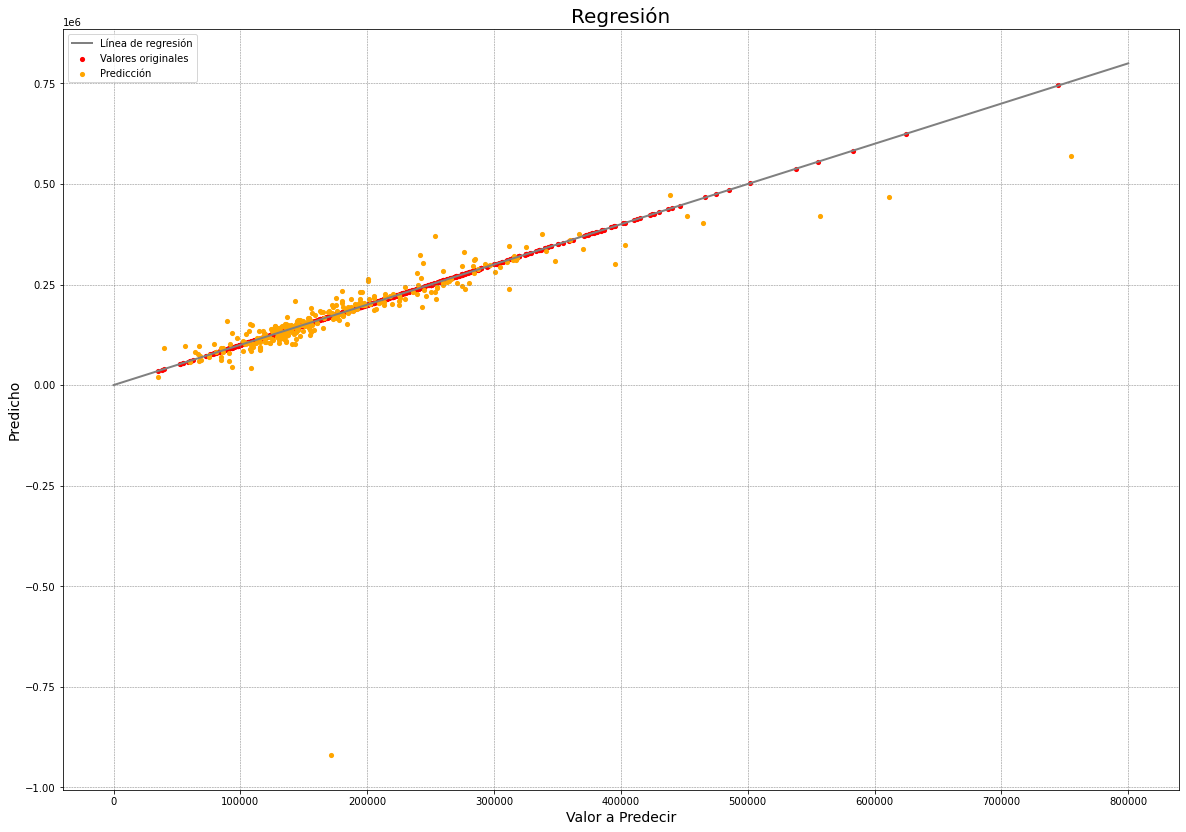

In [24]:
#Figura
plt.figure(figsize=(20, 14))
plt.title('Regresión',fontsize='20')
plt.grid(color='gray', linestyle='--', linewidth=.5)
plt.scatter(y_train, y_train, color='red', s=10, linewidth=2)
plt.scatter(y_test, predicciones, color='orange', s=10, linewidth=2)
plt.plot([0,800000], [0,800000], color='gray', linewidth=2)
plt.xlabel('Valor a Predecir',fontsize='14')
plt.ylabel('Predicho',fontsize='14')
plt.legend(['Línea de regresión','Valores originales','Predicción'])
plt.show()

Sobre la línea de regresión, se colocan los valores de nuestro set de entrenamiento en color rojo. Sobre ellos, los valores en color naranja son los valores predichos con el modelo de regresión múltiple. Como podemos ver, en torno al 0.25 encontramos una mayor dispersión de los valores. 

A pesar de los valores encontrarse un poco dispersos, no se alejan mucho de los valores originales. Existen excepciones (outliers) como el que se encuentra entre -0.75 y -1. Es posible que estos valores atípicos sean causados por haber utilizado más atributos de los debidos o por un conjunto de datos con un tamaño no lo suficientemente grande.

### 2) Haz un análisis de residuos del modelo lo más exhaustivo posible (0.5 puntos)

Aplicamos regresion lineal. Hacemos el ajuste con los datos de entrenamiento y vemos los resultados que hemos obtenido

In [25]:
puntuacion

0.36533673083016116

In [26]:
interceptron

-3059998.8522717627

In [27]:
coeficiente

array([ 3.80622713e+01,  2.98357728e+01,  7.39804968e-01,  6.71649907e+03,
        5.34867896e+03,  3.19985071e+02,  1.47273056e+02,  2.66827182e+01,
        1.71880667e+01,  6.74692709e+00,  1.14109877e-01,  2.40491211e+01,
        4.37950788e+00,  2.18566735e+01,  7.16185867e+00,  3.33980440e+01,
        2.34690359e+03, -1.42040475e+02,  3.05146381e+03,  1.52880369e+03,
       -2.20728163e+03, -1.04580700e+04,  1.81102087e+03,  4.90956788e+03,
        9.42185190e+02,  3.17278604e+01,  1.70146448e+01,  2.89937321e-01,
        1.23645640e+01,  4.78349316e+01,  4.02599235e+01,  6.88852432e+03,
        2.65986683e-01, -4.82689542e+02, -4.45781325e+02, -1.25397699e+04,
        1.05960515e+04, -9.81121688e+02,  1.20664851e+03,  1.71819160e+03,
       -1.37738688e+04,  1.37738688e+04,  4.92963518e+02, -2.42987685e+03,
        1.93691333e+03, -3.38769655e+03,  2.91705837e+03,  1.72885288e+03,
       -1.25821469e+03, -1.36824600e+03,  1.11437530e+04, -1.08833051e+04,
        1.10779801e+03,  

In [28]:
#Cambiamos las dimensiones del array sin modificar los datos para poder crear un dataframe con el que posteriormente
#calculamos la función lineal de las variables
valorCoeficientes = coeficiente.reshape(-1,1)
valores = []
for val in valorCoeficientes:
    valores.append(val)
    
dataFrameCoef = pd.DataFrame({'Coeficiente': dataset.columns, 'Valor': valores})
dataFrameCoef

,Coeficiente,Valor
0,MSSubClass,[38.062271305495656]
1,LotFrontage,[29.83577277795544]
2,LotArea,[0.7398049681007706]
3,OverallQual,[6716.49906989053]
4,OverallCond,[5348.678958183628]
...,...,...
312,SaleCondition_AdjLand,[2311.025855644159]
313,SaleCondition_Alloca,[14936.08883975962]
314,SaleCondition_Family,[-8095.902058937244]
315,SaleCondition_Normal,[-4410.159241553564]


<strong>Función lineal de las variables</strong>

In [29]:
res = 'y = '

for c in range(0, len(coeficiente)):
    val = np.round(coeficiente[c],2)
    i = c+1;
    if(i == len(coeficiente)):
        res = res + ''+str(val)+'*'+dataset.columns[c]
    else:
        res = res + ''+str(val)+'*'+dataset.columns[c]+' + '
print(res)

y = 38.06*MSSubClass + 29.84*LotFrontage + 0.74*LotArea + 6716.5*OverallQual + 5348.68*OverallCond + 319.99*YearBuilt + 147.27*YearRemodAdd + 26.68*MasVnrArea + 17.19*BsmtFinSF1 + 6.75*BsmtFinSF2 + 0.11*BsmtUnfSF + 24.05*TotalBsmtSF + 4.38*1stFlrSF + 21.86*2ndFlrSF + 7.16*LowQualFinSF + 33.4*GrLivArea + 2346.9*BsmtFullBath + -142.04*BsmtHalfBath + 3051.46*FullBath + 1528.8*HalfBath + -2207.28*BedroomAbvGr + -10458.07*KitchenAbvGr + 1811.02*TotRmsAbvGrd + 4909.57*Fireplaces + 942.19*GarageCars + 31.73*GarageArea + 17.01*WoodDeckSF + 0.29*OpenPorchSF + 12.36*EnclosedPorch + 47.83*3SsnPorch + 40.26*ScreenPorch + 6888.52*PoolArea + 0.27*MiscVal + -482.69*MoSold + -445.78*YrSold + -12539.77*MSZoning_C (all) + 10596.05*MSZoning_FV + -981.12*MSZoning_RH + 1206.65*MSZoning_RL + 1718.19*MSZoning_RM + -13773.87*Street_Grvl + 13773.87*Street_Pave + 492.96*Alley_Grvl + -2429.88*Alley_No + 1936.91*Alley_Pave + -3387.7*LotShape_IR1 + 2917.06*LotShape_IR2 + 1728.85*LotShape_IR3 + -1258.21*LotShape_Re

Segun la documentación del curso, el residuo en la fórmula de la regresión viene estimado por aquellas variables que no han formado parte de la ecuación. Nosotros no hemos eliminado ninguna de las columnas por lo que no tenemos ningún residuo en este apartado.

In [30]:
predicciones = reg.predict(X_test)

In [31]:
#Redondeamos las predicciones a números enteros para que se asemejen más a los precios del dataset
enteros = []
for pred in predicciones:
    a = round(pred)
    enteros.append(a)
predicciones = enteros

In [32]:
error = mean_squared_error(y_test,predicciones,squared=False)
error

69771.5806193805

### 3) Crea un modelo que permita saber qué variables afectan más a la hora de predecir el precio del inmueble. (0.75 puntos)

Del modelo creado en el apartado 1, obtenemos:

In [33]:
indices = (-coeficiente).argsort()[:10]
print('Los atributos que más influyen son:')
for number in indices:
    colname = dataset.columns[number]
    print(colname)

Los atributos que más influyen son:
PoolQC_No
RoofMatl_ClyTile
MiscFeature_TenC
GarageQual_Ex
Condition2_PosA
RoofStyle_Shed
BsmtCond_Po
Neighborhood_StoneBr
Condition2_Feedr
Condition2_Norm


In [34]:
indices = (coeficiente).argsort()[:10]
print('Los atributos que menos influyen son:')
for number in indices:
    colname = dataset.columns[number]
    print(colname)

Los atributos que menos influyen son:
PoolQC_Gd
PoolQC_Fa
PoolQC_Ex
Condition2_PosN
MiscFeature_Gar2
MiscFeature_Shed
MiscFeature_No
RoofMatl_Tar&Grv
RoofMatl_WdShake
MiscFeature_Othr


### 4) Vamos a crear ahora un modelo más sencillo teniendo en cuenta sólo algo obvio: el tamaño del inmueble (LotArea), para hacer un forecast del precio del inmueble. Calculad el coeficiente r de pearson entre LotArea y el precio del inmueble y dibujad el modelo. (0.5 puntos)

In [35]:
#Únicamente utilizamos los valores del atributo LotArea para predecir el precio del inmueble
X = dataset['LotArea'].values
#Dividimos el conjunto de datos entre los registros de entrenamiento (80%) y los registros de validación (20%)
X_train, X_test, y_train, y_test = train_test_split(X, precioDeVenta, test_size = 0.2, random_state = 42)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [36]:
#Calculamos la regresión
reg = LinearRegression().fit(X_train,y_train)
coeficiente = reg.coef_
interceptron = reg.intercept_
predicciones = reg.predict(X_test)

In [37]:
error = mean_squared_error(y_test,predicciones,squared=False)
error

84788.52525445858

In [38]:
#Coeficiente de Pearson
corr, _ = pearsonr(precioDeVenta, X)
print('Correlación de Pearson - Precio-Tamaño: %.3f' % corr)

Correlación de Pearson - Precio-Tamaño: 0.264


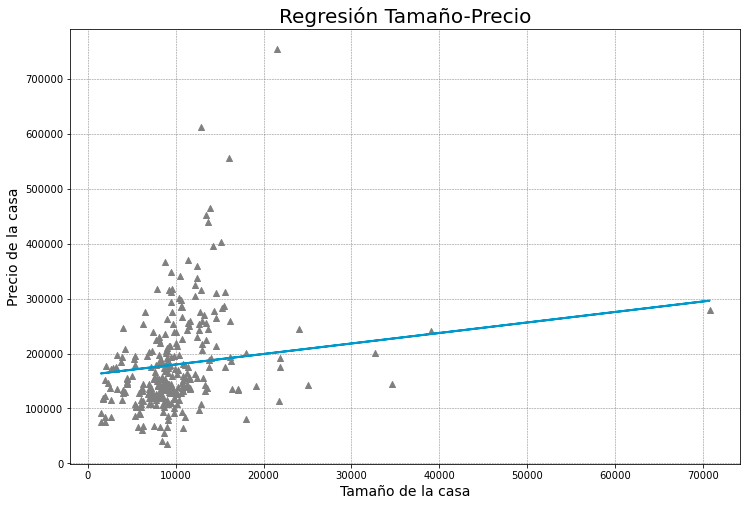

In [39]:
#Figura
plt.figure(figsize=(12, 8))
plt.title('Regresión Tamaño-Precio',fontsize='20')
plt.grid(color='gray', linestyle='--', linewidth=.5)
plt.scatter(X_test, y_test, color='gray', marker='^')
plt.plot(X_test, predicciones, color='#0099CC', linewidth=2)
plt.xlabel('Tamaño de la casa',fontsize='14')
plt.ylabel('Precio de la casa',fontsize='14')
plt.show()

Para calcular el precio de una casa, hay que tener en cuenta más variables. Lo explicamos con este caso particular donde vemos la dispersión de los datos respecto a la línea de regresión.

A medida que aumenta el tamaño del inmueble, el precio del metro unitario aumenta su valor de forma más moderada.

Realmente en este gráfico vemos como el tamaño de un inmueble no nos determina su precio sino que hay muchos otros atributos que en conjunto son los que ponen precio a una casa, como por ejemplo, el barrio donde se sitúa la vivienda, si tiene ascensor...

### 5) Cread también un modelo que tenga en cuenta la variable que representa la cantidad de calle pegada a la propiedad (LotFrontage). Calculad el coeficiente r de pearson entre LotFrontage y el precio del inmueble y dibujad el modelo. (0.5 puntos)

In [40]:
#Únicamente utilizamos los valores del atributo LotArea para predecir el precio del inmueble
X = dataset['LotFrontage'].values
#Dividimos el conjunto de datos entre los registros de entrenamiento (80%) y los registros de validación (20%)
X_train, X_test, y_train, y_test = train_test_split(X, precioDeVenta, test_size = 0.2, random_state = 42)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [41]:
#Calculamos la regresión
reg = LinearRegression().fit(X_train,y_train)
coeficiente = reg.coef_
interceptron = reg.intercept_
predicciones = reg.predict(X_test)

In [42]:
error = mean_squared_error(y_test,predicciones,squared=False)
error

80670.9292264606

In [43]:
#Coeficiente de Pearson
corr, _ = pearsonr(precioDeVenta, X)
print('Correlación de Pearson - Precio-Calle Pegada: %.3f' % corr)

Correlación de Pearson - Precio-Calle Pegada: 0.335


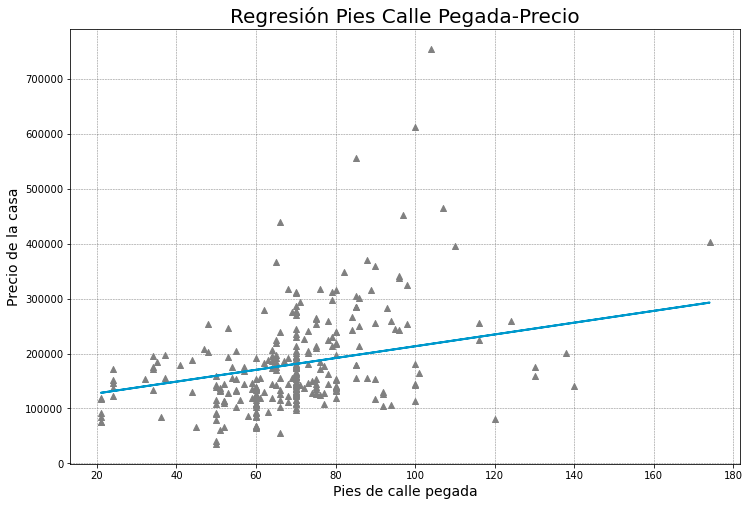

In [44]:
#Figura
plt.figure(figsize=(12, 8))
plt.title('Regresión Pies Calle Pegada-Precio',fontsize='20')
plt.grid(color='gray', linestyle='--', linewidth=.5)
plt.scatter(X_test, y_test,color='gray',marker='^')
plt.plot(X_test, predicciones, color='#0099CC', linewidth=2)
plt.xlabel('Pies de calle pegada',fontsize='14')
plt.ylabel('Precio de la casa',fontsize='14')
plt.show()

Igual que la gráfica anterior, con una sola variable no podemos decidir el precio de un inmueble. También es verdad que en esta figura, la dispersión se produce a lo largo de toda la línea de regresión dejando entrever una mayor correlación entre <i>LotFrontage</i> y el precio de la vivienda.

También encontramos valores atípicos. Además, para una calle con 70 pies pegada a una vivienda (también ocurre con una calle de 60 pies de forma más moderada), existe un gran rango de precios. Esto nos reafirma en cuanto a la necesidad de otros atributos para determinar el precio de un inmueble.

### 6) Comparad los modelos entre ellos y con el modelo completo del apartado 1). ¿Los modelos sencillos se acercan al modelo completo? ¿Qué diferencias encuentras?¿Qué características nos habrían resultado mejores para crear modelos más simples de predicción? (0,5puntos)

La verdad es que no se asemejan mucho los modelos pintados, si bien es cierto que con estos modelos podemos representar mejor la información. Con los otros, no podemos nada más que pintar una única variable, como hemos hecho con el precio y ajustar su estimación a la regresión esperada.

Quiza para entrar a valorar el precio de la casa tendriamos que haber jugado a pintar la regresion de las columnas que más importan. Con nuestro dataset, hemos visto que las columnas más importantes eran, PoolQC_No, RoofMatl_ClyTile, MiscFeature_TenC, GarageQual_Ex o Condition2_PosA entre otras por lo que si pintamos estos modelos quizá nos acercaríamos a una representación más cercana al modelo completo original.

También nos resulta "curioso" que en la regresión sobre los pies de calle pegada a las casas haya una distribución tan alineada en torno a 70 pies. Para hablar respecto del precio, tenemos algún que otro outlier como la casa de mayor tamaño que está por debajo del precio de la regresión. Esto podría deberse a que al ser tan grande se dificulta su venta y el vendedor ha decidido ponerla por debajo del precio de mercado.